In [7]:
import pandas as pd
import os
import numpy as np
controllable = pd.read_csv(os.getcwd()+'/Airbnb_Optimization/datasets/controllable_sampled.csv',index_col='id')
controllable.head()

,host_response_rate,host_listings_count,host_has_profile_pic,host_identity_verified,accommodates,bathrooms,bedrooms,beds,price,security_deposit,...,Amenties Include parking,Amenties Include Pets,Amenties Include Dishes and silverware,Amenties Include Coffee maker,Amenties Include Microwave,Amenties Include Refrigerator,offers_weekly_price,offers_monthly_price,charges_security_deposit,charges_cleaning_fee
id,,,,,,,,,,,,,,,,,,,,,
5435.0,100.000000,2.0,1.0,0.0,2.0,1.0,1.0,1.0,145.0,0.000000,...,0,1,1,1,1,1,0,1,1,1
20311.0,100.000000,1.0,1.0,1.0,2.0,1.0,1.0,1.0,70.0,150.000000,...,0,0,0,0,0,0,1,1,1,1
27024.0,100.000000,1.0,1.0,1.0,4.0,1.0,1.0,3.0,150.0,0.000000,...,0,0,0,0,0,0,1,1,1,1
62264.0,100.000000,2.0,1.0,1.0,2.0,1.0,1.0,1.0,65.0,300.000000,...,1,0,0,0,0,0,1,1,1,1
70381.0,93.247853,1.0,1.0,0.0,5.0,2.0,3.0,3.0,450.0,227.138887,...,0,1,0,0,0,0,0,0,0,1


In [2]:
controllable.columns

Index(['host_response_rate', 'host_listings_count', 'host_has_profile_pic',
       'host_identity_verified', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'price', 'security_deposit', 'cleaning_fee', 'guests_included',
       'extra_people', 'minimum_nights', 'maximum_nights', 'instant_bookable',
       'require_guest_profile_picture', 'require_guest_phone_verification',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'Label',
       'host_response_time_a few days or more',
       'host_response_time_within a day',
       'host_response_time_within a few hours',
       'host_response_time_within an hour', 'host_response_time_nan',
       'property_type_Apartment', 'property_type_House', 'property_type_Loft',
       'property_type_Other', 'property_type_Townhouse',
       'room_type_Entire home/apt', 'room_type_Hotel room',
       'room_type_Private room', 'room_t

In [10]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix,roc_auc_score
from sklearn.model_selection import train_test_split

X = controllable.drop(columns=['Label'])
Y = controllable['Label']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.80, random_state=42)


n_est_lim = 1000
gbc = GradientBoostingClassifier(n_estimators=100, max_depth=8,max_features='sqrt',
                                                  min_samples_leaf=50,
                                                  min_samples_split=500,
                                                  random_state=10,
                                                  subsample=0.8)
gbc.fit(X_train, Y_train)

GradientBoostingClassifier(max_depth=8, max_features='sqrt',
                           min_samples_leaf=50, min_samples_split=500,
                           random_state=10, subsample=0.8)

In [13]:
from sklearn.metrics import accuracy_score
gbc=GradientBoostingClassifier(learning_rate=0.025, max_depth=10,
                            max_features='sqrt',
                            min_samples_leaf=0.1489795918367347,
                            min_samples_split=0.22244897959183674,
                            n_estimators=2500)
gbc.fit(X_train, Y_train)
y_pred = gbc.predict(X_test)
accuracy_score(Y_test,y_pred)


0.640542577241899

In [11]:
parameters = {
    "loss":["deviance"],
    "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
    "min_samples_split": np.linspace(0.1, 0.5, 50),
    "min_samples_leaf": np.linspace(0.1, 0.5, 50),
    "max_depth":[3,5,7,8,9,10],
    "max_features":["log2","sqrt"],
    "criterion": ["friedman_mse",  "mae"],
    "subsample":[0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0],
    "n_estimators": [100,200,500,1000,1500,2000,2500]
    }


clf = RandomizedSearchCV(GradientBoostingClassifier(), parameters, random_state=0)
search = clf.fit(X_train, Y_train)
search.best_params_,search.best_estimator_

({'subsample': 1.0,
  'n_estimators': 2500,
  'min_samples_split': 0.22244897959183674,
  'min_samples_leaf': 0.1489795918367347,
  'max_features': 'sqrt',
  'max_depth': 10,
  'loss': 'deviance',
  'learning_rate': 0.025,
  'criterion': 'friedman_mse'},
 GradientBoostingClassifier(learning_rate=0.025, max_depth=10,
                            max_features='sqrt',
                            min_samples_leaf=0.1489795918367347,
                            min_samples_split=0.22244897959183674,
                            n_estimators=2500))

In [8]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix,roc_auc_score
from sklearn.model_selection import train_test_split


In [50]:
y_pred = gbc.predict(X_test)

In [17]:
from sklearn.metrics import accuracy_score

In [52]:
y_pred = gbc.predict(X_test)
accuracy_score(Y_test,y_pred)

0.6419241396634011

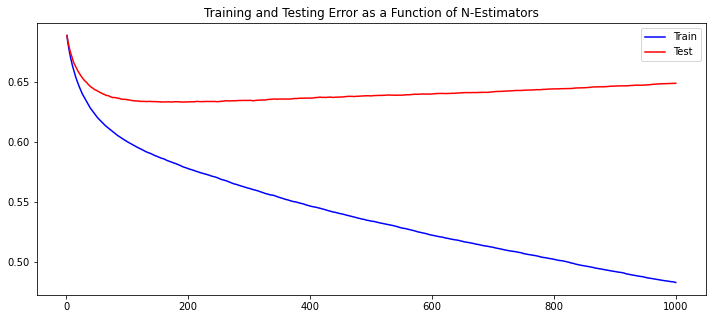

In [24]:
from pylab import rcParams
import matplotlib.pyplot as plt
import numpy as np
rcParams['figure.figsize'] = 12, 5


def LogLossP(Pt, Yt):
    return -1*((Yt==1)*np.log(Pt)+(Yt==0)*np.log(1-Pt)).mean()

p_train = gbc.staged_predict_proba(X_train)
p_test = gbc.staged_predict_proba(X_test)

ll_train = []
ll_test = []

for p in p_train:
    ll_train.append(LogLossP(p[:, 1], Y_train))
    
for p in p_test:
    ll_test.append(LogLossP(p[:, 1], Y_test))
    

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, n_est_lim + 1), ll_train, 'b-', label='Train')
plt.plot(np.arange(1, n_est_lim + 1), ll_test, 'r-', label='Test')
plt.title('Training and Testing Error as a Function of N-Estimators')
plt.legend()

In [44]:
from sklearn.model_selection import GridSearchCV
param_test1 = {'n_estimators':[100,
 200,
 300,
 400,
 500,
 600,
 700,
 800,
 900,
 1000,
 1100,
 1200,
 1300,
 1400,
 1500]}
gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, min_samples_split=500,min_samples_leaf=50,max_depth=8,max_features='sqrt',subsample=0.8,random_state=10), 
param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(X_train,Y_train)

/home/dawooood/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


GridSearchCV(cv=5,
             estimator=GradientBoostingClassifier(max_depth=8,
                                                  max_features='sqrt',
                                                  min_samples_leaf=50,
                                                  min_samples_split=500,
                                                  random_state=10,
                                                  subsample=0.8),
             iid=False, n_jobs=4,
             param_grid={'n_estimators': [100, 200, 300, 400, 500, 600, 700,
                                          800, 900, 1000, 1100, 1200, 1300,
                                          1400, 1500]},
             scoring='roc_auc')

In [45]:
gsearch1.get_params()


{'cv': 5,
 'error_score': nan,
 'estimator__ccp_alpha': 0.0,
 'estimator__criterion': 'friedman_mse',
 'estimator__init': None,
 'estimator__learning_rate': 0.1,
 'estimator__loss': 'deviance',
 'estimator__max_depth': 8,
 'estimator__max_features': 'sqrt',
 'estimator__max_leaf_nodes': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_impurity_split': None,
 'estimator__min_samples_leaf': 50,
 'estimator__min_samples_split': 500,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__n_estimators': 100,
 'estimator__n_iter_no_change': None,
 'estimator__presort': 'deprecated',
 'estimator__random_state': 10,
 'estimator__subsample': 0.8,
 'estimator__tol': 0.0001,
 'estimator__validation_fraction': 0.1,
 'estimator__verbose': 0,
 'estimator__warm_start': False,
 'estimator': GradientBoostingClassifier(max_depth=8, max_features='sqrt',
                            min_samples_leaf=50, min_samples_split=500,
                            random_state=10, subsample=0.8),
 

In [42]:
a=[x for x in range(100,1600,100)]

In [43]:
a

[100,
 200,
 300,
 400,
 500,
 600,
 700,
 800,
 900,
 1000,
 1100,
 1200,
 1300,
 1400,
 1500]

In [47]:
gsearch1.best_params_,gsearch1.best_score_

({'n_estimators': 100}, 0.7002949759074061)

In [53]:
param_test2 = {'max_depth':range(5,16,2), 'min_samples_split':range(200,1001,200)}
gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_features='sqrt',subsample=0.8,random_state=10), 
param_grid = param_test2, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(X_train,Y_train)
gsearch1.best_params_,gsearch1.best_score_

/home/dawooood/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


({'max_depth': 5, 'min_samples_split': 1000}, 0.7013061703841229)

In [55]:
gbc = GradientBoostingClassifier(n_estimators=100, max_depth=5,max_features='sqrt',
                                                  min_samples_leaf=50,
                                                  min_samples_split=1000,
                                                  random_state=10,
                                                  subsample=0.8)
gbc.fit(X_train, Y_train)
y_pred = gbc.predict(X_test)
accuracy_score(Y_test,y_pred)

0.6372770660638031

In [56]:
param_test3 = {'min_samples_split':range(1000,2100,200), 'min_samples_leaf':range(30,71,10)}
gsearch3 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100,max_depth=5,max_features='sqrt', subsample=0.8, random_state=10), 
param_grid = param_test3, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch3.fit(X_train,Y_train)
gsearch3.best_params_,gsearch3.best_score_

/home/dawooood/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


({'max_depth': 5, 'min_samples_split': 1000}, 0.7013061703841229)

In [57]:
gsearch3.best_params_,gsearch3.best_score_

({'min_samples_leaf': 70, 'min_samples_split': 1400}, 0.7031256854162494)

In [58]:
gsearch3.best_estimator_

GradientBoostingClassifier(max_depth=5, max_features='sqrt',
                           min_samples_leaf=70, min_samples_split=1400,
                           random_state=10, subsample=0.8)

In [59]:
gbc = GradientBoostingClassifier(n_estimators=100, max_depth=5,max_features='sqrt',
                                                  min_samples_leaf=70,
                                                  min_samples_split=1400,
                                                  random_state=10,
                                                  subsample=0.8)
gbc.fit(X_train, Y_train)
y_pred = gbc.predict(X_test)
accuracy_score(Y_test,y_pred)

0.6347023360964582

In [60]:
gsearch3.decision_function(X_test)

array([-0.09799257, -1.33163724,  0.04562769, ..., -0.5252299 ,
       -1.21696234, -0.33378999])

In [64]:
param_test4 = {'max_features':range(10,230,5)}

gsearch4 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100,max_depth=5,max_features='sqrt', subsample=0.8, random_state=10, min_samples_leaf = 70, min_samples_split = 1400), 
param_grid = param_test4, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch4.fit(X_train,Y_train)
gsearch4.best_params_,gsearch4.best_score_

/home/dawooood/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


({'max_features': 30}, 0.699502205902478)

In [76]:
gbc = GradientBoostingClassifier(n_estimators=200, max_depth=5,max_features= 30,
                                                  min_samples_leaf=70,
                                                  min_samples_split=1400,
                                                  random_state=10,
                                                  subsample=0.8,learning_rate=0.05)
gbc.fit(X_train, Y_train)
y_pred = gbc.predict(X_test)
accuracy_score(Y_test,y_pred)

0.6376538558151218

In [66]:
param_test5 = {'subsample':[0.6,0.7,0.75,0.8,0.85,0.9]}

gsearch5 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100,max_depth=5,max_features='sqrt', random_state=10, min_samples_leaf = 70, min_samples_split = 1400), 
param_grid = param_test5, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch5.fit(X_train,Y_train)
gsearch5.best_params_,gsearch4.best_score_

/home/dawooood/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


({'subsample': 0.8}, 0.699502205902478)

In [2]:
import pandas as pd
import os
uncontrollable = pd.read_csv(os.getcwd()+'/Airbnb_Optimization/datasets/uncontrollable_sample.csv',index_col='id')
uncontrollable.head()

,idpop_local_sum,idpop_citywide_sum,idpop_local_food_sum,idpop_citywide_food_sum,idpop_local_nightlife_sum,idpop_citywide_nightlife_sum,idpop_local_travel_sum,idpop_citywide_travel_sum,venue_count_500m,sub_cnt_20m,...,neighbourhood_West Village,neighbourhood_Westchester Village,neighbourhood_Westerleigh,neighbourhood_Whitestone,neighbourhood_Williamsbridge,neighbourhood_Williamsburg,neighbourhood_Windsor Terrace,neighbourhood_Woodhaven,neighbourhood_Woodlawn,neighbourhood_Woodside
id,,,,,,,,,,,,,,,,,,,,,
33699563.0,7.992767,0.803436,7.157023,0.805422,13.380945,0.630482,7.921177,0.630585,44,4,...,0,0,0,0,0,0,0,0,0,0
16585605.0,0.000769,0.739474,0.000769,0.608763,0.000769,0.752475,0.000769,0.892192,6,1,...,0,0,0,0,0,0,0,0,0,0
31767505.0,24.897783,2.047967,27.071885,2.982674,11.118003,1.365497,21.060435,2.646382,78,12,...,0,0,0,0,0,0,0,0,0,0
1655390.0,2.110251,0.568449,2.446163,0.568007,1.857215,0.577803,2.622797,0.551869,1,1,...,0,0,0,0,0,0,0,0,0,0
10615883.0,10.972633,0.684232,4.148196,0.725314,6.891011,0.619826,3.914252,0.598249,6,2,...,0,0,0,0,0,0,0,0,0,0


In [3]:
from sklearn import preprocessing

In [103]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [4]:
X = uncontrollable.drop(columns=['Label'])

#X = scaler.fit_transform(X)

In [5]:
from sklearn.metrics import confusion_matrix,roc_auc_score
from sklearn.model_selection import train_test_split
X = uncontrollable.drop(columns=['Label'])
Y = list(uncontrollable['Label'].T)

In [118]:
Y

[0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,


In [9]:
from sklearn.metrics import confusion_matrix,roc_auc_score
from sklearn.model_selection import train_test_split

X = uncontrollable.drop(columns=['Label'])
Y = list(uncontrollable['Label'].T)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.80, random_state=42)



gbc = GradientBoostingClassifier(n_estimators=100, max_depth=8,max_features='sqrt',
                                                  min_samples_leaf=50,
                                                  min_samples_split=500,
                                                  random_state=10,
                                                  subsample=0.8)
gbc.fit(X_train, Y_train)

GradientBoostingClassifier(max_depth=8, max_features='sqrt',
                           min_samples_leaf=50, min_samples_split=500,
                           random_state=10, subsample=0.8)

In [10]:
y_pred = gbc.predict(X_test)
accuracy_score(Y_test,y_pred)

0.5535970102771722

In [82]:
from sklearn.model_selection import GridSearchCV
param_test1 = {'n_estimators':[100,
 200,
 300,
 400,
 500,
 600,
 700,
 800,
 900,
 1000,
 1100,
 1200,
 1300,
 1400,
 1500]}
gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, min_samples_split=500,min_samples_leaf=50,max_depth=8,max_features='sqrt',subsample=0.8,random_state=10), 
param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(X_train,Y_train)
gsearch1.best_params_ , gsearch1.best_score_

/home/dawooood/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


({'n_estimators': 100}, 0.5631091060036008)

In [84]:
param_test2 = {'max_depth':range(5,16,2), 'min_samples_split':range(200,1001,200)}
gsearch2 = GridSearchCV(estimator = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_features='sqrt',subsample=0.8,random_state=10), 
param_grid = param_test2, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch2.fit(X_train,Y_train)
gsearch2.best_params_,gsearch2.best_score_

/home/dawooood/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


({'max_depth': 7, 'min_samples_split': 600}, 0.5629771006894682)

In [86]:
len(controllable.columns)

69

In [87]:
param_test3 = {'min_samples_split':range(600,1900,200), 'min_samples_leaf':range(30,71,10)}
gsearch3 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100,max_depth=7,max_features='sqrt', subsample=0.8, random_state=10), 
param_grid = param_test3, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch3.fit(X_train,Y_train)
gsearch3.best_params_,gsearch3.best_score_

/home/dawooood/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


({'min_samples_leaf': 30, 'min_samples_split': 1800}, 0.5667199514301762)

In [90]:
param_test4 = {'max_features':range(10,230,5)}

gsearch4 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100,max_depth=7, subsample=0.8, random_state=10, min_samples_leaf = 30, min_samples_split = 1800), 
param_grid = param_test4, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch4.fit(X_train,Y_train)
gsearch4.best_params_,gsearch4.best_score_

/home/dawooood/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


({'max_features': 15}, 0.5667199514301762)

In [92]:
gbc = GradientBoostingClassifier(n_estimators=100, max_depth=8,max_features=15,
                                                  min_samples_leaf=30,
                                                  min_samples_split=1800,
                                                  random_state=10,
                                                 subsample=0.8)
gbc.fit(X_train,Y_train)
y_pred = gbc.predict(X_test)
accuracy_score(Y_test,y_pred)

0.5538461538461539

In [95]:
gbc = GradientBoostingClassifier(n_estimators=400, max_depth=8,max_features=15,
                                                  min_samples_leaf=30,
                                                  min_samples_split=1800,
                                                  random_state=10,
                                                 subsample=0.8,learning_rate=0.01)
gbc.fit(X_train,Y_train)
y_pred = gbc.predict(X_test)
accuracy_score(Y_test,y_pred)

0.5519775770787917

In [123]:
neigh = [col for col in uncontrollable.columns if 'neighbourhood' in col]

In [126]:
uncontrollable= uncontrollable.drop(columns=neigh)

In [127]:
X = uncontrollable.drop(columns=['Label'])
Y = uncontrollable['Label']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.80, random_state=42)



gbc = GradientBoostingClassifier(n_estimators=100, max_depth=8,max_features='sqrt',
                                                  min_samples_leaf=50,
                                                  min_samples_split=500,
                                                  random_state=10,
                                                  subsample=0.8)
gbc.fit(X_train, Y_train)

GradientBoostingClassifier(max_depth=8, max_features='sqrt',
                           min_samples_leaf=50, min_samples_split=500,
                           random_state=10, subsample=0.8)

In [128]:
y_pred = gbc.predict(X_test)
accuracy_score(Y_test,y_pred)

0.5519775770787917

In [129]:
gbc.feature_importances_


array([0.0407926 , 0.06534036, 0.05556221, 0.06689587, 0.05756247,
       0.05751694, 0.0616179 , 0.07532267, 0.04882817, 0.01078717,
       0.02514048, 0.04787747, 0.05508456, 0.03907503, 0.01956987,
       0.00764856, 0.01715563, 0.01781164, 0.02469596, 0.0232134 ,
       0.01043404, 0.01601894, 0.01708586, 0.02061521, 0.02112663,
       0.01298816, 0.02230105, 0.0172284 , 0.01164966, 0.01421802,
       0.01883505])

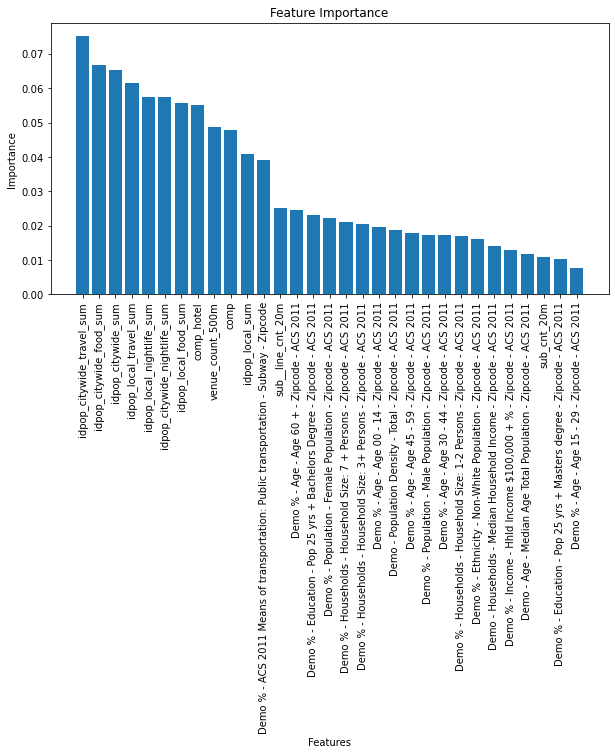

In [130]:
import matplotlib.pyplot as plt
%matplotlib inline

#Get feature importances
feature_mi = gbc.feature_importances_

#Sort indices
featureinds = feature_mi.argsort()

plt.figure(figsize=(10,5))
plt.title("Feature Importance")

#Plot features in order of importance
plt.bar(X_train.columns.values[featureinds[::-1]],feature_mi[featureinds[::-1]])
plt.xticks(X_train.columns.values[featureinds[::-1]],rotation="90")
plt.xlabel('Features')
plt.ylabel('Importance')

plt.show()

In [133]:
np.linspace(100,1500,100)

array([ 100.        ,  114.14141414,  128.28282828,  142.42424242,
        156.56565657,  170.70707071,  184.84848485,  198.98989899,
        213.13131313,  227.27272727,  241.41414141,  255.55555556,
        269.6969697 ,  283.83838384,  297.97979798,  312.12121212,
        326.26262626,  340.4040404 ,  354.54545455,  368.68686869,
        382.82828283,  396.96969697,  411.11111111,  425.25252525,
        439.39393939,  453.53535354,  467.67676768,  481.81818182,
        495.95959596,  510.1010101 ,  524.24242424,  538.38383838,
        552.52525253,  566.66666667,  580.80808081,  594.94949495,
        609.09090909,  623.23232323,  637.37373737,  651.51515152,
        665.65656566,  679.7979798 ,  693.93939394,  708.08080808,
        722.22222222,  736.36363636,  750.50505051,  764.64646465,
        778.78787879,  792.92929293,  807.07070707,  821.21212121,
        835.35353535,  849.49494949,  863.63636364,  877.77777778,
        891.91919192,  906.06060606,  920.2020202 ,  934.34343

In [134]:
X = uncontrollable.drop(columns=['Label'])
Y = uncontrollable['Label']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.80, random_state=42)

In [ ]:
parameters = {
    "loss":["deviance"],
    "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
    "min_samples_split": range(100, 2000, 10),
    "min_samples_leaf": range(5,200,5),
    "max_depth":[3,5,7,8],
    "max_features":["log2","sqrt"],
    "criterion": ["friedman_mse",  "mae"],
    "subsample":[0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0],
    "n_estimators": range(100,2100,100)
    }

clf = GridSearchCV(GradientBoostingClassifier(), parameters, cv=10, n_jobs=-1)

clf.fit(X_train, Y_train)
print(clf.score(trainX, trainY))
print(clf.best_params_)


In [14]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
parameters = {
    "loss":["deviance"],
    "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
    "min_samples_split": np.linspace(0.1, 0.5, 12),
    "min_samples_leaf": np.linspace(0.1, 0.5, 12),
    "max_depth":[3,5,7,8],
    "max_features":["log2","sqrt"],
    "criterion": ["friedman_mse",  "mae"],
    "subsample":[0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0],
    "n_estimators": [100,200,500,1000]
    }


clf = RandomizedSearchCV(GradientBoostingClassifier(), parameters, random_state=0)
search = clf.fit(X_train, Y_train)
search.best_params_

{'subsample': 0.9,
 'n_estimators': 1000,
 'min_samples_split': 0.42727272727272736,
 'min_samples_leaf': 0.24545454545454548,
 'max_features': 'sqrt',
 'max_depth': 7,
 'loss': 'deviance',
 'learning_rate': 0.05,
 'criterion': 'friedman_mse'}

In [15]:
search.best_estimator_

GradientBoostingClassifier(learning_rate=0.05, max_depth=7, max_features='sqrt',
                           min_samples_leaf=0.24545454545454548,
                           min_samples_split=0.42727272727272736,
                           n_estimators=1000, subsample=0.9)

In [16]:
gbc = GradientBoostingClassifier(learning_rate=0.05, max_depth=7, max_features='sqrt',
                           min_samples_leaf=0.24545454545454548,
                           min_samples_split=0.42727272727272736,
                           n_estimators=1000, subsample=0.9)

gbc.fit(X_train,Y_train)
y_pred = gbc.predict(X_test)
accuracy_score(Y_test,y_pred)

0.5504827156649019

In [18]:
parameters = {
    "loss":["deviance"],
    "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
    "min_samples_split": np.linspace(0.1, 0.5, 50),
    "min_samples_leaf": np.linspace(0.1, 0.5, 50),
    "max_depth":[3,5,7,8,9,10],
    "max_features":["log2","sqrt"],
    "criterion": ["friedman_mse",  "mae"],
    "subsample":[0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0],
    "n_estimators": [100,200,500,1000,1500,2000,2500]
    }


clf = RandomizedSearchCV(GradientBoostingClassifier(), parameters, random_state=0)
search = clf.fit(X_train, Y_train)
search.best_params_,search.best_estimator_

({'subsample': 0.95,
  'n_estimators': 100,
  'min_samples_split': 0.3040816326530612,
  'min_samples_leaf': 0.1979591836734694,
  'max_features': 'log2',
  'max_depth': 7,
  'loss': 'deviance',
  'learning_rate': 0.075,
  'criterion': 'friedman_mse'},
 GradientBoostingClassifier(learning_rate=0.075, max_depth=7,
                            max_features='log2',
                            min_samples_leaf=0.1979591836734694,
                            min_samples_split=0.3040816326530612,
                            subsample=0.95))

In [19]:
search.best_score_

0.5591786411927839

In [20]:
gbc = GradientBoostingClassifier(learning_rate=0.075, max_depth=7,
                            max_features='log2',
                            min_samples_leaf=0.1979591836734694,
                            min_samples_split=0.3040816326530612,
                            subsample=0.95)

gbc.fit(X_train,Y_train)
y_pred = gbc.predict(X_test)
accuracy_score(Y_test,y_pred)

0.5492369978199938

In [9]:
import pandas as pd
import os
uncontrollable = pd.read_csv(os.getcwd()+'/Airbnb_Optimization/datasets/uncontrollable_sample.csv',index_col='id')
uncontrollable.head()
len(uncontrollable)

20068

In [12]:
from sklearn.metrics import confusion_matrix,roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
X = uncontrollable.drop(columns=['Label'])
Y = list(uncontrollable['Label'].T)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.80, random_state=42)



In [13]:
len(X_train),len(X_test)

(16054, 4014)

In [15]:
parameters = {
    "loss":["deviance"],
    "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
    "min_samples_split": np.linspace(0.1, 0.5, 50),
    "min_samples_leaf": np.linspace(0.1, 0.5, 50),
    "max_depth":[3,5,7,8,9,10],
    "max_features":["log2","sqrt"],
    "criterion": ["friedman_mse",  "mae"],
    "subsample":[0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0],
    "n_estimators": [100,200,500,1000,1500,2000,2500]
    }


clf = RandomizedSearchCV(GradientBoostingClassifier(), parameters, random_state=0)
search = clf.fit(X_train, Y_train)
search.best_params_,search.best_estimator_

({'subsample': 1.0,
  'n_estimators': 2500,
  'min_samples_split': 0.22244897959183674,
  'min_samples_leaf': 0.1489795918367347,
  'max_features': 'sqrt',
  'max_depth': 10,
  'loss': 'deviance',
  'learning_rate': 0.025,
  'criterion': 'friedman_mse'},
 GradientBoostingClassifier(learning_rate=0.025, max_depth=10,
                            max_features='sqrt',
                            min_samples_leaf=0.1489795918367347,
                            min_samples_split=0.22244897959183674,
                            n_estimators=2500))

In [18]:
from sklearn.metrics import accuracy_score
gbc = GradientBoostingClassifier(learning_rate=0.025, max_depth=10,
                            max_features='sqrt',
                            min_samples_leaf=0.1489795918367347,
                            min_samples_split=0.22244897959183674,
                            n_estimators=2500)
gbc.fit(X_train,Y_train)
y_pred = gbc.predict(X_test)
accuracy_score(Y_test,y_pred)

0.5697558545092177

In [25]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
parameters = {
    #"loss":["deviance"],
    "learning_rate": [0.025] #[0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
    ,"min_samples_split": [0.22244897959183674]#np.linspace(0.1, 0.5, 12),
    ,"min_samples_leaf": [0.1489795918367347]# np.linspace(0.1, 0.5, 12),
    ,"max_depth":[10]#3,5,7,8],
     ,"max_features":np.linspace(0.1,0.5,12),
#     "criterion": ["friedman_mse",  "mae"],
    #"subsample":[0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0],
    "n_estimators": [2500]#100,200,500,1000]
    }


clf = RandomizedSearchCV(GradientBoostingClassifier(), parameters, random_state=0)
search = clf.fit(X_train, Y_train)
search.best_params_

KeyboardInterrupt: 

In [22]:
search.best_params_

{'subsample': 1.0,
 'n_estimators': 2500,
 'min_samples_split': 0.22244897959183674,
 'min_samples_leaf': 0.1489795918367347,
 'max_features': 'sqrt',
 'max_depth': 10,
 'loss': 'deviance',
 'learning_rate': 0.025,
 'criterion': 'friedman_mse'}

In [27]:
parameters = {
    "loss":["deviance"],
    "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
    "min_samples_split": np.linspace(0.1, 0.5, 12),
    "min_samples_leaf": np.linspace(0.1, 0.5, 12),
    "max_depth":[3,5,7,8,9,10],
    "max_features":np.linspace(0.1,1,24),
    "criterion": ["friedman_mse",  "mae"],
    "subsample":[0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0],
    "n_estimators": [100,200,500,1000,1500,2000,2500]fd

KeyboardInterrupt: 

In [25]:
a

In [26]:
a